In [55]:
#packages needed
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True,
                  'axes.titlepad': 20})

In [56]:
#creating dataframes from csv's
df_2022 = pd.read_csv('datasets/cae_2022.csv')
df_2021 = pd.read_csv('datasets/cae_2021.csv')

I am exploring in this notebook are:

How does the average ACT score for each subject for all students over the years progressed in Kentucky state? By Demographic/ County, School

In [57]:
#Filtering  the data that meets criteria!.

#df_2022 = df_2022[(df_2022['SCHOOL NAME'] != '---District Total---') & (df_2022['DISTRICT NAME'].str.contains('County')) ] 
#df_2021 = df_2021[(df_2021['SCHOOL NAME'] != '---District Total---') & (df_2021['DISTRICT NAME'].str.contains('County'))  ] 

df_County_2022 = df_2022[(df_2022['SCHOOL NAME'] != '---District Total---') & (df_2022['DISTRICT NAME'] != 'State') ] 
df_County_2021 = df_2021[(df_2021['SCHOOL NAME'] != '---District Total---') & (df_2021['DISTRICT NAME'] != 'State')  ] 



In [58]:
#Choosing  the columns that needed
df_County_subject_2022 = df_County_2022[[ 'COUNTY NAME' , 'SCHOOL NAME', 'DEMOGRAPHIC', 'Average ACT Scores: English' , 'Average ACT Scores: Reading', 'Average ACT Scores: Math', 'Average ACT Scores: Science', 'Average ACT Composite Score' ]]
df_County_subject_2021 = df_County_2021[[ 'COUNTY NAME' , 'SCHOOL NAME', 'DEMOGRAPHIC', 'Average ACT Scores: English' , 'Average ACT Scores: Reading', 'Average ACT Scores: Math', 'Average ACT Scores: Science', 'Average ACT Composite Score' ]]

In [59]:
#Removing the null values from dataframes
df_County_subject_2022  = df_County_subject_2022.dropna()
df_County_subject_2021  = df_County_subject_2021.dropna()

In [60]:
df_County_subject_2022.head()

,COUNTY NAME,SCHOOL NAME,DEMOGRAPHIC,Average ACT Scores: English,Average ACT Scores: Reading,Average ACT Scores: Math,Average ACT Scores: Science,Average ACT Composite Score
17,ADAIR,Adair County High School,All Students,15.2,17.2,16.7,16.8,16.6
18,ADAIR,Adair County High School,Female,15.5,18.2,16.8,16.6,16.9
19,ADAIR,Adair County High School,Male,14.9,16.2,16.6,16.9,16.3
23,ADAIR,Adair County High School,Hispanic or Latino,14.7,16.6,15.8,17.3,16.2
26,ADAIR,Adair County High School,White (non-Hispanic),15.4,17.3,16.8,16.9,16.7


In [61]:
df_County_subject_2021.head()

,COUNTY NAME,SCHOOL NAME,DEMOGRAPHIC,Average ACT Scores: English,Average ACT Scores: Reading,Average ACT Scores: Math,Average ACT Scores: Science,Average ACT Composite Score
17,ADAIR,Adair County High School,All Students,14.7,16.4,16.3,17.0,16.2
18,ADAIR,Adair County High School,Female,16.0,18.0,16.9,17.6,17.3
19,ADAIR,Adair County High School,Male,13.4,14.7,15.8,16.3,15.2
26,ADAIR,Adair County High School,White (non-Hispanic),14.8,16.4,16.5,17.2,16.4
28,ADAIR,Adair County High School,Students with Disabilities (IEP),10.0,12.8,14.2,13.7,12.9


In [62]:
#Merging both 2021 and 2022 school data 

df_County_subject_trend = pd.merge(df_County_subject_2021, df_County_subject_2022, how = 'inner' ,  on = ['COUNTY NAME' , 'SCHOOL NAME' , 'DEMOGRAPHIC'] )

df_County_subject_trend.head()

,COUNTY NAME,SCHOOL NAME,DEMOGRAPHIC,Average ACT Scores: English_x,Average ACT Scores: Reading_x,Average ACT Scores: Math_x,Average ACT Scores: Science_x,Average ACT Composite Score_x,Average ACT Scores: English_y,Average ACT Scores: Reading_y,Average ACT Scores: Math_y,Average ACT Scores: Science_y,Average ACT Composite Score_y
0,ADAIR,Adair County High School,All Students,14.7,16.4,16.3,17.0,16.2,15.2,17.2,16.7,16.8,16.6
1,ADAIR,Adair County High School,Female,16.0,18.0,16.9,17.6,17.3,15.5,18.2,16.8,16.6,16.9
2,ADAIR,Adair County High School,Male,13.4,14.7,15.8,16.3,15.2,14.9,16.2,16.6,16.9,16.3
3,ADAIR,Adair County High School,White (non-Hispanic),14.8,16.4,16.5,17.2,16.4,15.4,17.3,16.8,16.9,16.7
4,ADAIR,Adair County High School,Students with Disabilities (IEP),10.0,12.8,14.2,13.7,12.9,11.1,13.4,14.6,13.3,13.1


In [63]:
#Renaming the columns to respective years
df_County_subject_trend.rename(columns = {'Average ACT Scores: English_x':'Average ACT Scores: English_2021', 'Average ACT Scores: English_y' : 'Average ACT Scores: English_2022'}, inplace = True)
df_County_subject_trend.rename(columns = {'Average ACT Scores: Reading_x':'Average ACT Scores: Reading_2021', 'Average ACT Scores: Reading_y' : 'Average ACT Scores: Reading_2022'}, inplace = True)
df_County_subject_trend.rename(columns = {'Average ACT Scores: Math_x':'Average ACT Scores: Math_2021', 'Average ACT Scores: Math_y' : 'Average ACT Scores: Math_2022'}, inplace = True)
df_County_subject_trend.rename(columns = {'Average ACT Scores: Science_x':'Average ACT Scores: Science_2021', 'Average ACT Scores: Science_y' : 'Average ACT Scores: Science_2022'}, inplace = True)
df_County_subject_trend.rename(columns = {'Average ACT Scores: Science_x':'Average ACT Scores: Science_2021', 'Average ACT Scores: Science_y' : 'Average ACT Scores: Science_2022'}, inplace = True)
df_County_subject_trend.rename(columns = {'Average ACT Composite Score_x':'Average ACT Composite Score_2021', 'Average ACT Composite Score_y' : 'Average ACT Composite Score_2022'}, inplace = True)

In [64]:
df_County_subject_trend.head()

,COUNTY NAME,SCHOOL NAME,DEMOGRAPHIC,Average ACT Scores: English_2021,Average ACT Scores: Reading_2021,Average ACT Scores: Math_2021,Average ACT Scores: Science_2021,Average ACT Composite Score_2021,Average ACT Scores: English_2022,Average ACT Scores: Reading_2022,Average ACT Scores: Math_2022,Average ACT Scores: Science_2022,Average ACT Composite Score_2022
0,ADAIR,Adair County High School,All Students,14.7,16.4,16.3,17.0,16.2,15.2,17.2,16.7,16.8,16.6
1,ADAIR,Adair County High School,Female,16.0,18.0,16.9,17.6,17.3,15.5,18.2,16.8,16.6,16.9
2,ADAIR,Adair County High School,Male,13.4,14.7,15.8,16.3,15.2,14.9,16.2,16.6,16.9,16.3
3,ADAIR,Adair County High School,White (non-Hispanic),14.8,16.4,16.5,17.2,16.4,15.4,17.3,16.8,16.9,16.7
4,ADAIR,Adair County High School,Students with Disabilities (IEP),10.0,12.8,14.2,13.7,12.9,11.1,13.4,14.6,13.3,13.1


In [65]:
#changing the order for easy comparison
df_County_subject_trend = df_County_subject_trend.iloc[:, [0,1,2,3,8,4,9,5,10,6,11,7,12]]
df_County_subject_trend.head()

,COUNTY NAME,SCHOOL NAME,DEMOGRAPHIC,Average ACT Scores: English_2021,Average ACT Scores: English_2022,Average ACT Scores: Reading_2021,Average ACT Scores: Reading_2022,Average ACT Scores: Math_2021,Average ACT Scores: Math_2022,Average ACT Scores: Science_2021,Average ACT Scores: Science_2022,Average ACT Composite Score_2021,Average ACT Composite Score_2022
0,ADAIR,Adair County High School,All Students,14.7,15.2,16.4,17.2,16.3,16.7,17.0,16.8,16.2,16.6
1,ADAIR,Adair County High School,Female,16.0,15.5,18.0,18.2,16.9,16.8,17.6,16.6,17.3,16.9
2,ADAIR,Adair County High School,Male,13.4,14.9,14.7,16.2,15.8,16.6,16.3,16.9,15.2,16.3
3,ADAIR,Adair County High School,White (non-Hispanic),14.8,15.4,16.4,17.3,16.5,16.8,17.2,16.9,16.4,16.7
4,ADAIR,Adair County High School,Students with Disabilities (IEP),10.0,11.1,12.8,13.4,14.2,14.6,13.7,13.3,12.9,13.1


In [66]:
#Pick the county name to find ACT Score for each subject by DEMOGRAPHIC
input_demographic  =  input("Enter the DEMOGRAPHIC Name")
print (input_demographic)

All Students


In [67]:
#Pick the county name to find ACT Score for each subject by County
input_county  =  input("Enter the County Name")
print (input_county)

BOONE


In [68]:
#filtering the data by specified County and  Demographic
df_County_demographic_subject_trend = df_County_subject_trend[(df_County_subject_trend['DEMOGRAPHIC'] == input_demographic) & (df_County_subject_trend['COUNTY NAME'] == input_county) ] 
df_County_demographic_subject_trend 

,COUNTY NAME,SCHOOL NAME,DEMOGRAPHIC,Average ACT Scores: English_2021,Average ACT Scores: English_2022,Average ACT Scores: Reading_2021,Average ACT Scores: Reading_2022,Average ACT Scores: Math_2021,Average ACT Scores: Math_2022,Average ACT Scores: Science_2021,Average ACT Scores: Science_2022,Average ACT Composite Score_2021,Average ACT Composite Score_2022
78,BOONE,Randall K. Cooper High School,All Students,18.5,20.1,20.1,21.3,19.3,19.8,20.0,20.7,19.6,20.6
86,BOONE,Boone County High School,All Students,16.3,15.8,17.4,18.4,17.2,17.1,17.6,17.9,17.3,17.4
96,BOONE,Conner High School,All Students,18.5,18.7,19.7,20.5,19.1,19.0,19.4,20.1,19.3,19.7
104,BOONE,Larry A. Ryle High School,All Students,19.7,18.8,20.9,20.7,20.0,19.4,20.8,20.3,20.5,19.9
1392,BOONE,Walton-Verona High School,All Students,19.0,19.5,21.0,20.9,18.7,18.4,19.9,19.6,19.8,19.7


The Average ACT Score Treding for specificied county and demographic for each subject in Kentucky.

Text(0.5, 1.0, 'The Average ACT Score for each subject for All Students students in BOONE county ')

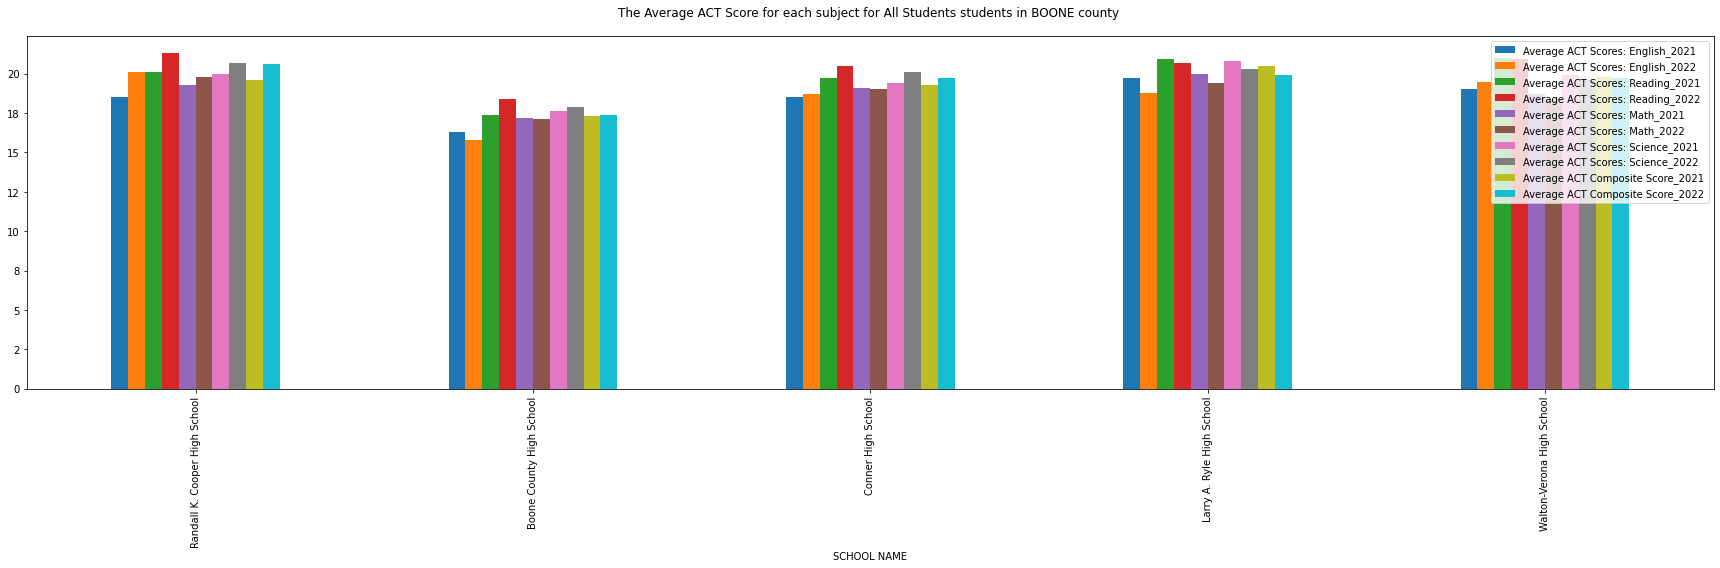

In [69]:
#Plotting the Trending 
fig = df_County_demographic_subject_trend.plot(x= "SCHOOL NAME", kind="bar", figsize=(24,8) )
#fmt = '{x:,.0f}'
fig.yaxis.set_major_formatter('{x:,.0f}')
fig.set_title( f'The Average ACT Score for each subject for {input_demographic} students in {input_county} county ')

In [74]:
#Pick the School Name to find ACT Score for each subject by County and Demographic
input_school  =  input("Enter School Name")
print (input_school)

Larry A. Ryle High School


In [71]:
#filtering the data by specified County, Demographic and school
df_County_school_demographic_subject_trend = df_County_demographic_subject_trend[(df_County_demographic_subject_trend['SCHOOL NAME'] == input_school)  ] 
df_County_school_demographic_subject_trend 

,COUNTY NAME,SCHOOL NAME,DEMOGRAPHIC,Average ACT Scores: English_2021,Average ACT Scores: English_2022,Average ACT Scores: Reading_2021,Average ACT Scores: Reading_2022,Average ACT Scores: Math_2021,Average ACT Scores: Math_2022,Average ACT Scores: Science_2021,Average ACT Scores: Science_2022,Average ACT Composite Score_2021,Average ACT Composite Score_2022
104,BOONE,Larry A. Ryle High School,All Students,19.7,18.8,20.9,20.7,20.0,19.4,20.8,20.3,20.5,19.9


The Average ACT Score Treding for specificied school for each subject by specified demographic and county in Kentucky.

Text(0.5, 1.0, 'The Average ACT Score for each subject for All Students students in BOONE county for Larry A. Ryle High School ')

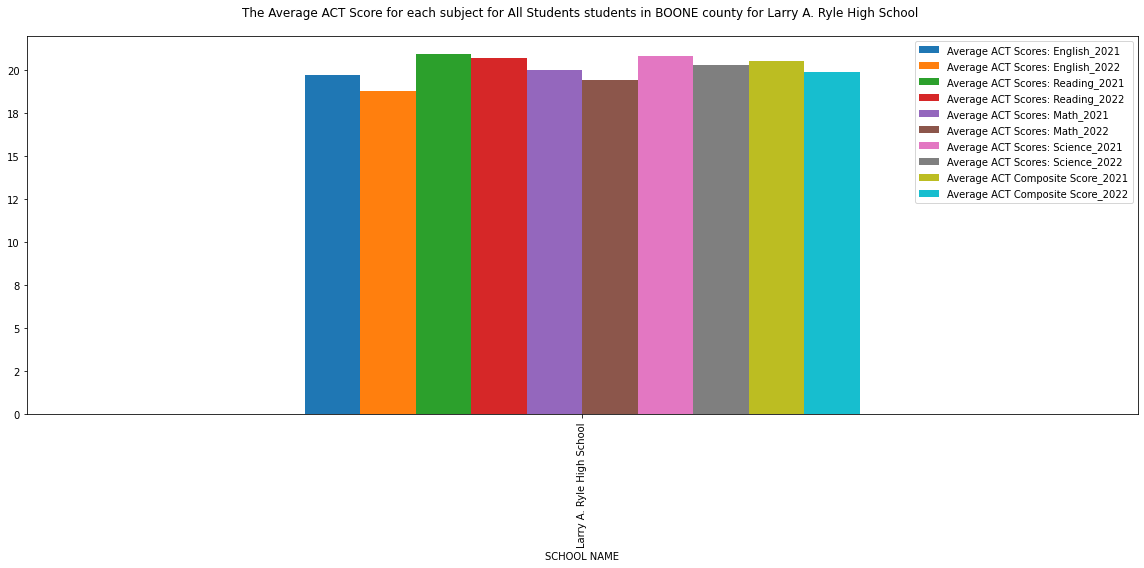

In [73]:
#Plotting the Trending for School
fig = df_County_school_demographic_subject_trend.plot(x= "SCHOOL NAME", kind="bar", figsize=(16,8) )
#fmt = '{x:,.0f}'
fig.yaxis.set_major_formatter('{x:,.0f}')
fig.set_title( f'The Average ACT Score for each subject for {input_demographic} students in {input_county} county for {input_school} ')